This notebook is about the first chapter from Dayan and Abbott where they introduce convolutions and firing rate computations.
Spike trains in the notebook come from the retina and were downloaded from here http://crcns.org/data-sets/retina/ret-1

In [29]:
from scipy import io
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import elephant.conversion as conv
import neo as n
import quantities as pq

In [15]:
dat=io.loadmat('/home/maria/Documents/NeuralDataAnalysis/crcns_ret-1/Data/20080516_R1.mat')
print(dat['spikes'][0][0])
spks=dat['spikes'][0][0]
print(spks.shape)
print(1.5*10**3)

[[2.2400000e-02]
 [3.0000000e-02]
 [8.8100000e-02]
 ...
 [1.4999324e+03]
 [1.4999482e+03]
 [1.4999887e+03]]
(38885, 1)
1500.0


In [53]:
st = n.SpikeTrain(spks.flatten() * pq.s, t_stop=1500.0 * pq.s)
x = conv.BinnedSpikeTrain(st, num_bins=1500,binsize=0.01 * pq.s, t_start=0 * pq.ms)
#print(x.spike_indices)
print(x.to_bool_array())
print(x.to_bool_array().shape)
spks_conv=x.to_bool_array()[0]

[[False False  True ...  True False  True]]
(1, 1500)


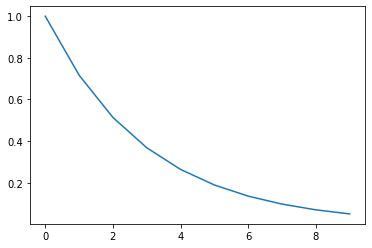

In [74]:
tau=3
h=signal.exponential(10,0,3,False)
plt.plot(h)

In [75]:
conv=np.convolve(h,spks_conv).flatten()

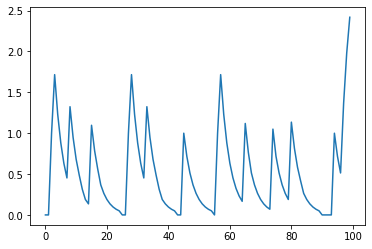

In [76]:
plt.plot(conv[:100])